In [16]:
!apt install unzip

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unzip is already the newest version (6.0-26ubuntu3.2).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [17]:
!unzip archive.zip -d arc

unzip:  cannot find or open archive.zip, archive.zip.zip or archive.zip.ZIP.


In [18]:
!unzip archive -d ds

unzip:  cannot find or open archive, archive.zip or archive.ZIP.


In [19]:
!unzip -FF archive

unzip:  cannot find or open archive, archive.zip or archive.ZIP.


In [20]:
!unzip archive.zip

unzip:  cannot find or open archive.zip, archive.zip.zip or archive.zip.ZIP.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install kaggle

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'

In [ ]:
!kaggle datasets download -d nirmalsankalana/crop-pest-and-disease-detection

 99% 1.24G/1.25G [00:13<00:00, 67.2MB/s]
100% 1.25G/1.25G [00:13<00:00, 99.5MB/s]


In [ ]:
import zipfile

# Define the path to your zip file
file_path = 'crop-pest-and-disease-detection.zip'  # Replace 'your_file.zip' with your file's name

# Unzip the file to a specific destination
with zipfile.ZipFile("crop-pest-and-disease-detection.zip", 'r') as zip_ref:
    zip_ref.extractall('sdfg')  # Replace 'destination_folder' with your desired folder

In [ ]:
import os

# DATAPATH
directory_path = "sdfg"

# LIST ALL FILE IN THE DIRECTORY
files = os.listdir(directory_path)


print(files)


['Cassava mosaic', 'Maize grasshoper', 'Maize streak virus', 'Cashew leaf miner', 'Tomato septoria leaf spot', 'Maize leaf blight', 'Cassava brown spot', 'Cassava healthy', 'Tomato healthy', 'Maize leaf spot', 'Tomato leaf blight', 'Cashew anthracnose', 'Cassava bacterial blight', 'Maize fall armyworm', 'Maize leaf beetle', 'Cassava green mite', 'Cashew gumosis', 'Cashew red rust', 'Cashew healthy', 'Maize healthy', 'Tomato leaf curl', 'Tomato verticulium wilt']


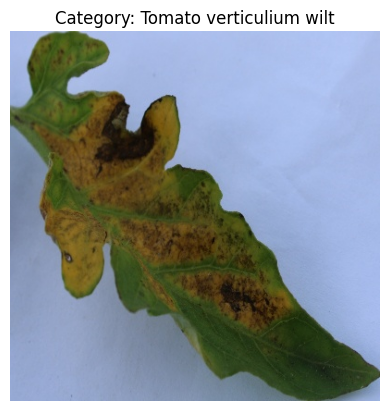

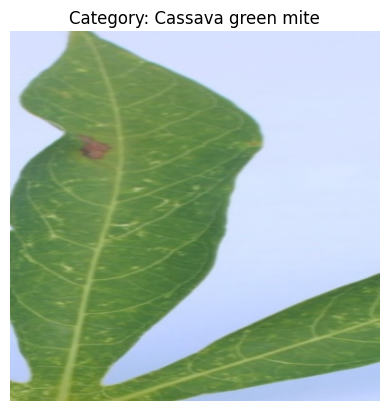

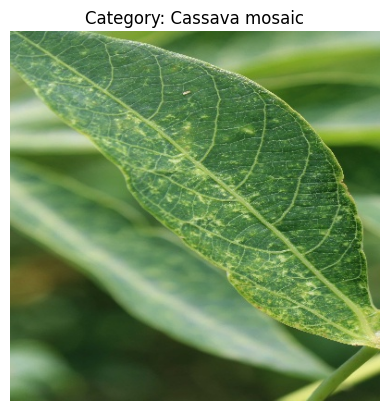

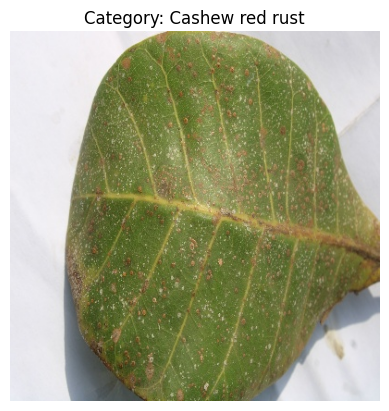

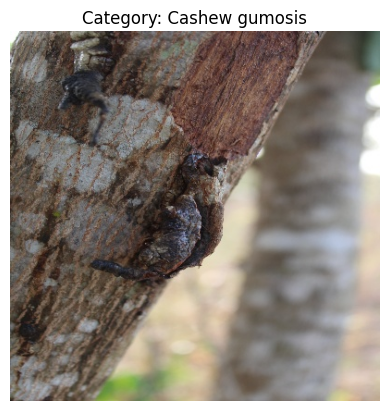

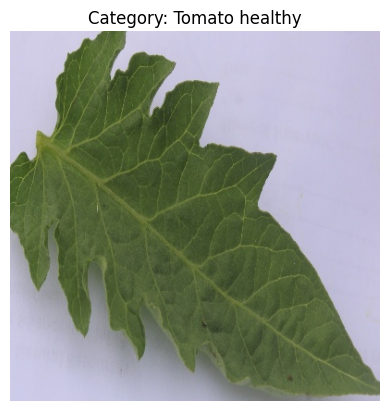

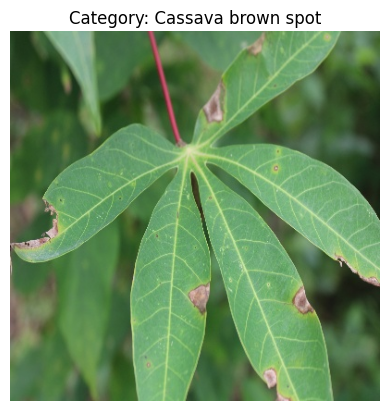

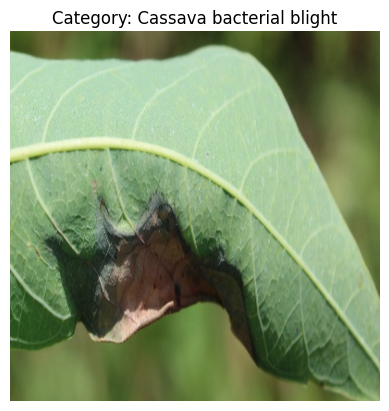

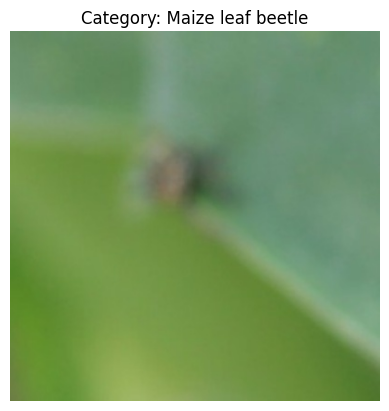

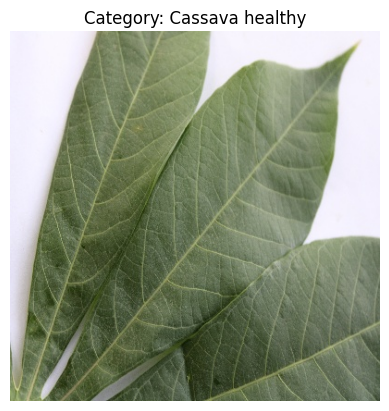

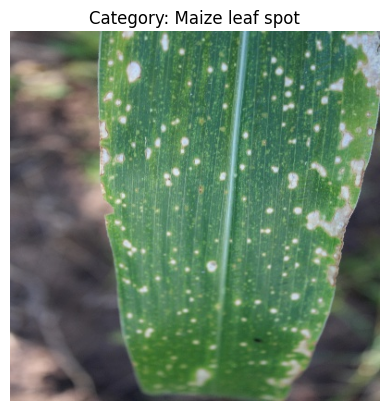

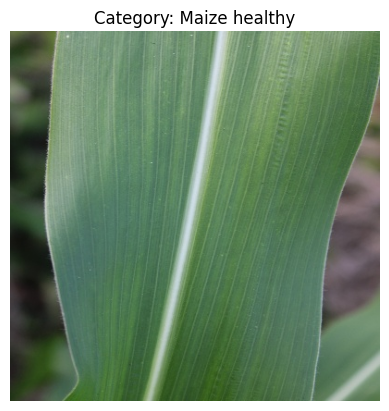

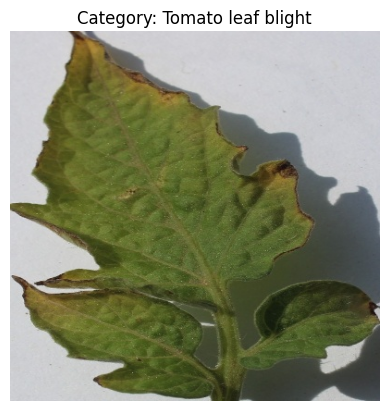

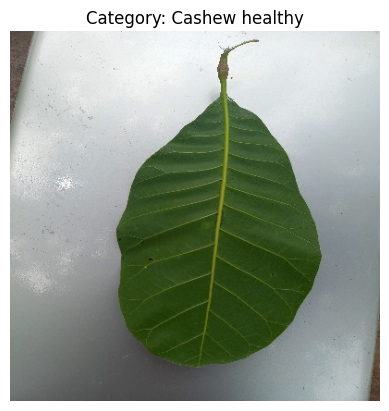

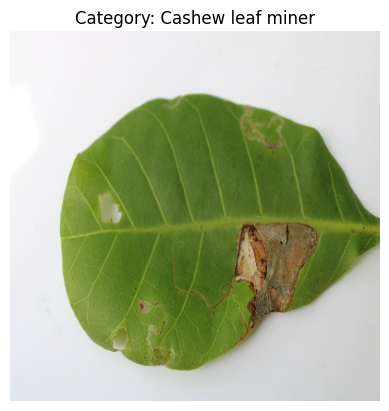

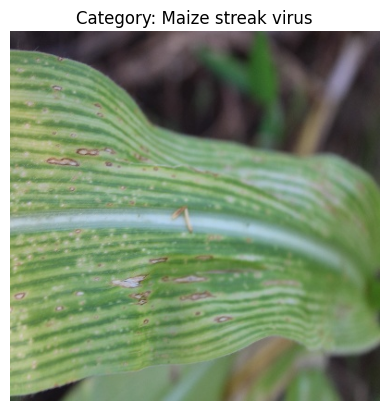

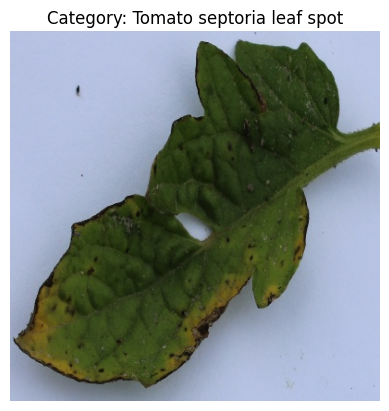

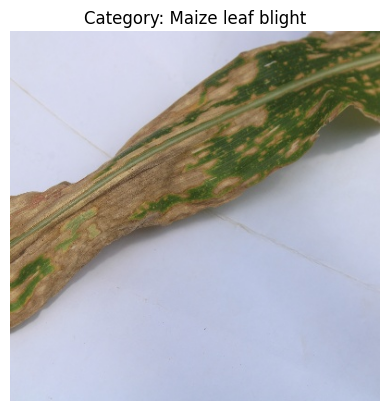

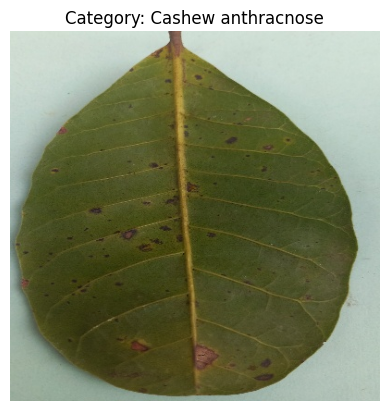

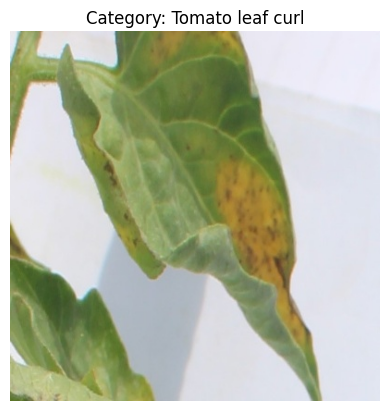

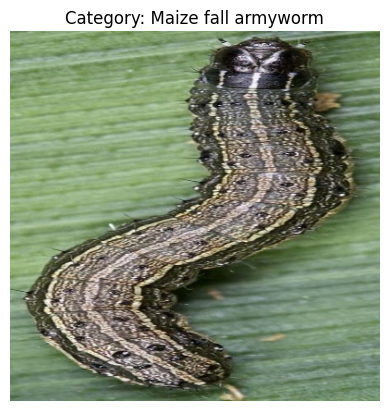

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# ALL CATEGORIES LIST
categories = ['Tomato verticulium wilt', 'Cassava green mite', 'Cassava mosaic', 'Cashew red rust', 'Cashew gumosis',
              'Tomato healthy', 'Cassava brown spot', 'Cassava bacterial blight', 'Maize leaf beetle', 'Cassava healthy',
              'Maize leaf spot', 'Maize healthy', 'Tomato leaf blight', 'Cashew healthy', 'Cashew leaf miner',
              'Maize streak virus', 'Tomato septoria leaf spot', 'Maize leaf blight',
              'Cashew anthracnose', 'Tomato leaf curl', 'Maize fall armyworm']

#LOOP THROUGH EACH CATEGORY AND DISPALY AN IMAGE
for category in categories:
    # DATAPATH
    category_path = os.path.join("sdfg", category)

    #LIST ALL FILES IN THE SUBDIRECTORY
    files_in_category = os.listdir(category_path)

    #CHOOSE THE 1ST FILE IN THE LIST
    image_filename = files_in_category[0]

    # CREATE THE FULL PATH TO THE IMAGE
    image_path = os.path.join(category_path, image_filename)


    img = mpimg.imread(image_path)

    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Category: {category}')
    plt.show()



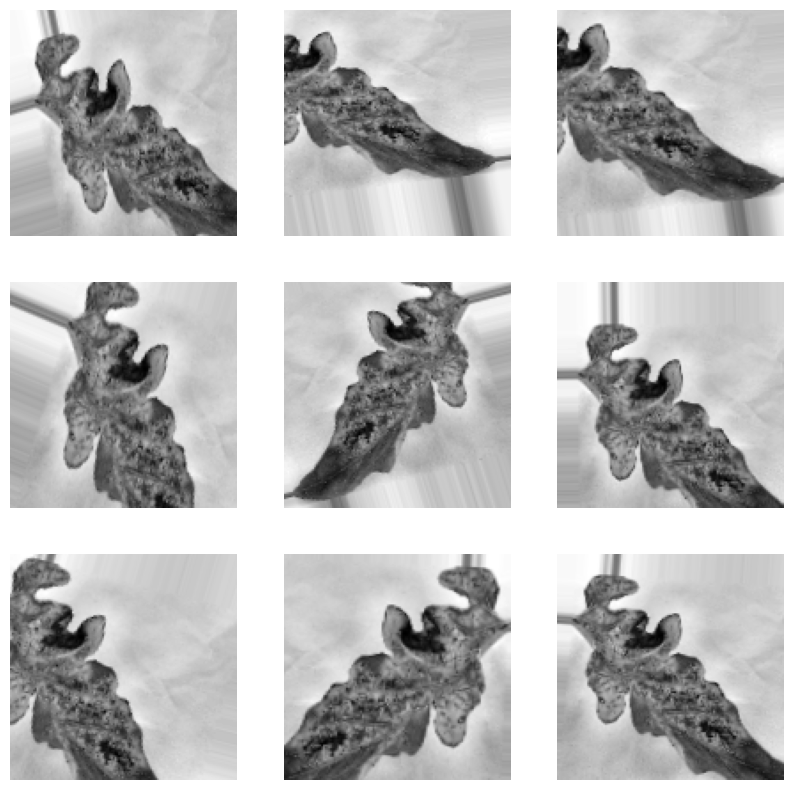

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt

# FUNCTION TO LOAD AND PREPROCESS IMAGE
def load_and_preprocess_images(directory, label, image_size=(128, 128), clahe_clip_limit=2.0):
    images = []
    labels = []

    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):
            file_path = os.path.join(directory, filename)
            try:
                img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
                if img is not None:
                    img = cv2.resize(img, image_size)

                    # Apply CLAHE (CONTRAST LIMITED ADAPTIVE HISTOGRAM EQUALIZATION)
                    clahe = cv2.createCLAHE(clipLimit=clahe_clip_limit)
                    img = clahe.apply(img)

                    images.append(img)
                    labels.append(label)
            except cv2.error as e:
                pass  # Skip the image

    return images, labels

categories = ['Tomato verticulium wilt', 'Cassava green mite', 'Cassava mosaic', 'Cashew red rust', 'Cashew gumosis',
              'Tomato healthy', 'Cassava brown spot', 'Cassava bacterial blight', 'Maize leaf beetle', 'Cassava healthy',
              'Maize leaf spot', 'Maize healthy', 'Tomato leaf blight', 'Cashew healthy', 'Cashew leaf miner',
              'Maize streak virus', 'Tomato septoria leaf spot', 'Maize leaf blight',
              'Cashew anthracnose', 'Tomato leaf curl', 'Maize fall armyworm']


all_images = []
all_labels = []


for category in categories:

    category_path = os.path.join("sdfg", category)


    images, labels = load_and_preprocess_images(category_path, label=category)


    all_images.extend(images)
    all_labels.extend(labels)


all_images = np.array(all_images)
all_labels = np.array(all_labels)


if len(all_images.shape) == 3:
    all_images = np.expand_dims(all_images, axis=-1)


label_encoder = LabelEncoder()
all_labels_numeric = label_encoder.fit_transform(all_labels)


all_labels_one_hot = to_categorical(all_labels_numeric)


all_images_normalized = all_images / 255.0


datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


plt.figure(figsize=(10, 10))
for i in range(9):
    augmented_image = datagen.random_transform(all_images_normalized[0])
    plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image.squeeze(), cmap='gray')
    plt.axis('off')

plt.show()




In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt

# FUNCTION TO LOAD AND PREPROCESS IMAGE
def load_and_preprocess_images(directory, label, image_size=(128, 128), clahe_clip_limit=2.0):
    images = []
    labels = []

    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):
            file_path = os.path.join(directory, filename)
            try:
                img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
                if img is not None:
                    img = cv2.resize(img, image_size)

                    # Apply CLAHE (CONTRAST LIMITED ADAPTIVE HISTOGRAM EQUALIZATION)
                    clahe = cv2.createCLAHE(clipLimit=clahe_clip_limit)
                    img = clahe.apply(img)

                    images.append(img)
                    labels.append(label)
            except cv2.error as e:
                pass  # Skip the image

    return images, labels

categories = ['Tomato verticulium wilt', 'Cassava green mite', 'Cassava mosaic', 'Cashew red rust', 'Cashew gumosis',
              'Tomato healthy', 'Cassava brown spot', 'Cassava bacterial blight', 'Maize leaf beetle', 'Cassava healthy',
              'Maize leaf spot', 'Maize healthy', 'Tomato leaf blight', 'Cashew healthy', 'Cashew leaf miner',
              'Maize streak virus', 'Tomato septoria leaf spot', 'Maize leaf blight',
              'Cashew anthracnose', 'Tomato leaf curl', 'Maize fall armyworm']


all_images = []
all_labels = []


for category in categories:

    category_path = os.path.join("sdfg", category)


    images, labels = load_and_preprocess_images(category_path, label=category)


    all_images.extend(images)
    all_labels.extend(labels)


all_images = np.array(all_images)
all_labels = np.array(all_labels)


if len(all_images.shape) == 3:
    all_images = np.expand_dims(all_images, axis=-1)


label_encoder = LabelEncoder()
all_labels_numeric = label_encoder.fit_transform(all_labels)


all_labels_one_hot = to_categorical(all_labels_numeric)


all_images_normalized = all_images / 255.0


datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


# SPLIT DATA INTO TRAIN AND TESTING SET
X_train, X_test, y_train, y_test = train_test_split(all_images_normalized, all_labels_one_hot, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)



Shape of X_train: (19597, 128, 128, 1)
Shape of y_train: (19597, 21)
Shape of X_test: (4900, 128, 128, 1)
Shape of y_test: (4900, 21)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


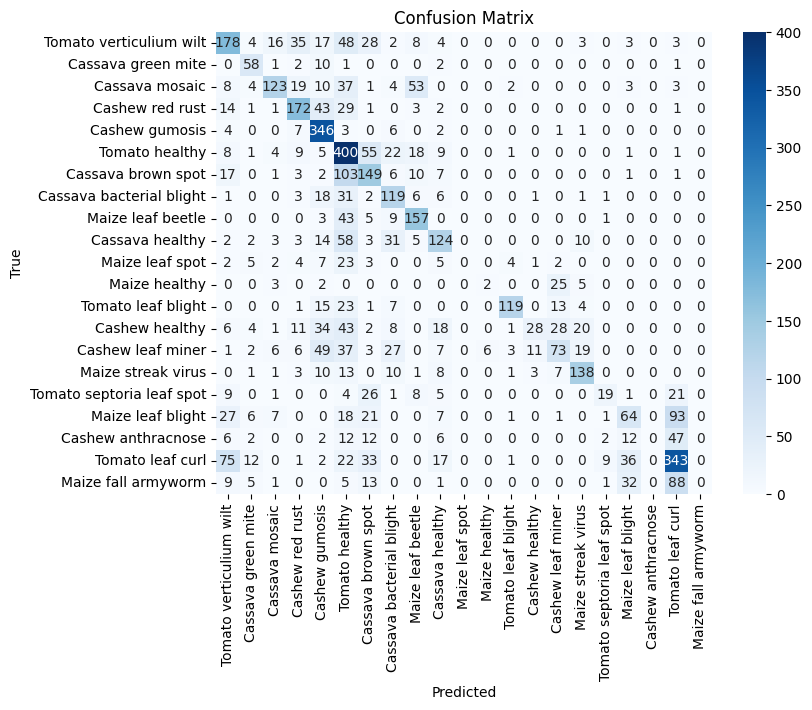

In [15]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt

# FUNCTION TO LOAD AND PREPROCESS IMAGE
def load_and_preprocess_images(directory, label, image_size=(128, 128), clahe_clip_limit=2.0):
    images = []
    labels = []

    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):
            file_path = os.path.join(directory, filename)
            try:
                img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
                if img is not None:
                    img = cv2.resize(img, image_size)

                    # Apply CLAHE (CONTRAST LIMITED ADAPTIVE HISTOGRAM EQUALIZATION)
                    clahe = cv2.createCLAHE(clipLimit=clahe_clip_limit)
                    img = clahe.apply(img)

                    images.append(img)
                    labels.append(label)
            except cv2.error as e:
                pass  # Skip the image

    return images, labels

categories = ['Tomato verticulium wilt', 'Cassava green mite', 'Cassava mosaic', 'Cashew red rust', 'Cashew gumosis',
              'Tomato healthy', 'Cassava brown spot', 'Cassava bacterial blight', 'Maize leaf beetle', 'Cassava healthy',
              'Maize leaf spot', 'Maize healthy', 'Tomato leaf blight', 'Cashew healthy', 'Cashew leaf miner',
              'Maize streak virus', 'Tomato septoria leaf spot', 'Maize leaf blight',
              'Cashew anthracnose', 'Tomato leaf curl', 'Maize fall armyworm']


all_images = []
all_labels = []


for category in categories:

    category_path = os.path.join("sdfg", category)


    images, labels = load_and_preprocess_images(category_path, label=category)


    all_images.extend(images)
    all_labels.extend(labels)


all_images = np.array(all_images)
all_labels = np.array(all_labels)


if len(all_images.shape) == 3:
    all_images = np.expand_dims(all_images, axis=-1)


label_encoder = LabelEncoder()
all_labels_numeric = label_encoder.fit_transform(all_labels)


all_labels_one_hot = to_categorical(all_labels_numeric)


all_images_normalized = all_images / 255.0


datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


# SPLIT DATA INTO TRAIN AND TESTING SET
X_train, X_test, y_train, y_test = train_test_split(all_images_normalized, all_labels_one_hot, test_size=0.2, random_state=42)




import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


# Convert labels to one-hot encoding
label_encoder = LabelEncoder()
all_labels_numeric = label_encoder.fit_transform(all_labels)
num_classes = len(label_encoder.classes_)
all_labels_one_hot = to_categorical(all_labels_numeric, num_classes=num_classes)



# CNN MODEL
model = models.Sequential()

# CONVOLUTIONAL LAYERS
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# FULLY CONNECTED LAYERS
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

# COMPILE THE MODEL
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# DISPLAY MODEL SUMMARY
model.summary()

# TRAIN MODEL
batch_size = 32
epochs = 30

history = model.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
                    steps_per_epoch=len(X_train) // batch_size,
                    epochs=epochs,
                    validation_data=(X_test, y_test))

# EVALUATE THE MODEL ON TEST SET
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

# CONFUSION MATRIX AND CLASSIFICATION REPORT
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

print("Confusion Matrix:")
print(confusion_matrix(y_true_classes, y_pred_classes))

print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes))

# PLOT CONFUSION MATRIX
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_true_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

